In [19]:
import rasterio.mask
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
europe_shape = gpd.read_file('/cluster/work/cpesm/trtim/possibility-for-electricity-autarky/build/national/units.geojson')

img_old = {}
img_new = {}
with rasterio.open(
    '/cluster/work/cpesm/brynmorp/euro-spores/land-eligibility/build/elevation-europe.tif'
) as src:
    clc = src.read(1)
    crs = src.crs
    europe_reshaped = europe_shape.to_crs(crs)
    
    for country in europe_shape.country_code.unique():
        img_old[country], transform_nor_old = rasterio.mask.mask(
            src, europe_reshaped[europe_reshaped.country_code == country].geometry.values, 
            crop=True
        )
    
with rasterio.open(
    '/cluster/work/cpesm/brynmorp/possibility-for-electricity-autarky/build/elevation-europe.tif'
) as src:
    clc = src.read(1)
    crs = src.crs
    europe_reshaped = europe_shape.to_crs(crs)
    
    for country in europe_shape.country_code.unique():
        img_new[country], transform_nor_old = rasterio.mask.mask(
            src, europe_reshaped[europe_reshaped.country_code == country].geometry.values, 
            crop=True
        )

In [3]:
for i in [img_old, img_new]:
    for k, v in i.items():
        _data = v[0].astype(float)
        _data[_data < 0] = np.nan
        i[k] = _data

In [23]:
pd.MultiIndex.from_tuples((('mean', 'old'), ('mean', 'new'), ('std', 'old'), ('std', 'new')))

MultiIndex(levels=[['mean', 'std'], ['new', 'old']],
           labels=[[0, 0, 1, 1], [1, 0, 1, 0]])

In [24]:
countries = [i for i in img_new.keys()]
foo = pd.DataFrame(
    data=[
        [img_old[i][~np.isnan(img_old[i])].mean(), img_new[i][~np.isnan(img_new[i])].mean(), img_old[i][~np.isnan(img_old[i])].std(), img_new[i][~np.isnan(img_new[i])].std()] 
        for i in countries
    ], 
    index=countries, 
    columns=pd.MultiIndex.from_tuples([('mean', 'old'), ('mean', 'new'), ('std', 'old'), ('std', 'new')])
)

In [28]:
print(foo.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="2" halign="left">mean</th>
      <th colspan="2" halign="left">std</th>
    </tr>
    <tr>
      <th></th>
      <th>old</th>
      <th>new</th>
      <th>old</th>
      <th>new</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>AUT</th>
      <td>948.638921</td>
      <td>946.235086</td>
      <td>658.201199</td>
      <td>657.760337</td>
    </tr>
    <tr>
      <th>BEL</th>
      <td>156.589176</td>
      <td>156.534579</td>
      <td>160.938583</td>
      <td>161.023487</td>
    </tr>
    <tr>
      <th>BGR</th>
      <td>472.360924</td>
      <td>472.234314</td>
      <td>430.281938</td>
      <td>430.273889</td>
    </tr>
    <tr>
      <th>HRV</th>
      <td>309.060402</td>
      <td>308.064884</td>
      <td>288.609915</td>
      <td>288.820496</td>
    </tr>
    <tr>
      <th>CYP</th>
      <td>298.503325</td>
      <td>296.580758</td>
      <td>292.321813</td>
      <td>292.151258<

In [33]:
foo = img_nor_old[0].astype(float)
foo[foo < 0] = np.nan 

In [ ]:
plt.pcolormesh(foo[::-1])

In [31]:
bar = img_nor_new[0].astype(float)
bar[bar < 0] = np.nan 

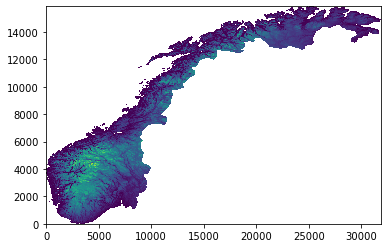

In [32]:
plt.pcolormesh(bar[::-1])

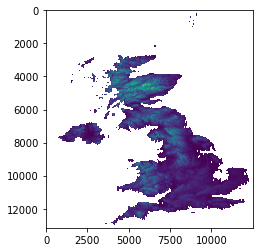

In [24]:
plt.imshow(foo, origin='upper')

In [ ]:
plt.imshow(foo, origin='upper')